In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
###Training image preprocessing

In [4]:
training_set=tf.keras.utils.image_dataset_from_directory(
    "train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [5]:
###Validation Image PreProcessing

In [6]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
#for x, y in training_set:
##    print(x.shape)
#    print(y.shape)

In [9]:
###Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model=Sequential()

In [12]:
## Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
##Output layer
model.add(Dense(units=38,activation='softmax'))

In [23]:
###Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [26]:
## Training Model 

In [27]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)  

Epoch 1/10
2197/2197 [==============================] - 392s 173ms/step - loss: 1.3684 - accuracy: 0.5992 - val_loss: 0.4208 - val_accuracy: 0.8723
Epoch 2/10
2197/2197 [==============================] - 2443s 1s/step - loss: 0.4386 - accuracy: 0.8608 - val_loss: 0.3109 - val_accuracy: 0.8968
Epoch 3/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.2652 - accuracy: 0.9143 - val_loss: 0.1796 - val_accuracy: 0.9430
Epoch 4/10
2197/2197 [==============================] - 220s 100ms/step - loss: 0.1844 - accuracy: 0.9392 - val_loss: 0.1584 - val_accuracy: 0.9486
Epoch 5/10
2197/2197 [==============================] - 222s 101ms/step - loss: 0.1336 - accuracy: 0.9558 - val_loss: 0.2144 - val_accuracy: 0.9330
Epoch 6/10
2197/2197 [==============================] - 223s 101ms/step - loss: 0.1070 - accuracy: 0.9645 - val_loss: 0.1642 - val_accuracy: 0.9503
Epoch 7/10
2197/2197 [==============================] - 221s 101ms/step - loss: 0.0867 - accuracy: 0.9713 - val_lo

In [28]:
##Model Evaluation

In [29]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 70s 32ms/step - loss: 0.0316 - accuracy: 0.9897


In [42]:
print(train_loss,train_acc)

0.031580690294504166 0.9896721243858337


In [43]:
## Model Validation set

In [44]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 17s 31ms/step - loss: 0.1232 - accuracy: 0.9639


In [ ]:
print(val_loss,val_acc)

0.12316227704286575 0.963862955570221


In [ ]:
## Saving Model

In [ ]:
model.save("trained_model.h5")

In [ ]:
model.save("trained_model.keras")

In [45]:
training_history.history

{'loss': [1.3684316873550415,
  0.43860626220703125,
  0.2651694416999817,
  0.18441517651081085,
  0.1335853785276413,
  0.1069653108716011,
  0.0867164134979248,
  0.07086626440286636,
  0.06167327240109444,
  0.05640954524278641],
 'accuracy': [0.5991749167442322,
  0.8607582449913025,
  0.9143040180206299,
  0.9392275214195251,
  0.9558005332946777,
  0.9645209312438965,
  0.9713208675384521,
  0.9768404364585876,
  0.9798705577850342,
  0.9818052649497986],
 'val_loss': [0.4207845628261566,
  0.31085774302482605,
  0.17963425815105438,
  0.15839911997318268,
  0.21439163386821747,
  0.16417287290096283,
  0.14171157777309418,
  0.10819966346025467,
  0.14060825109481812,
  0.12316221743822098],
 'val_accuracy': [0.8722968101501465,
  0.8968244791030884,
  0.9429774880409241,
  0.948554515838623,
  0.9329615235328674,
  0.9503186941146851,
  0.9592533707618713,
  0.9665376543998718,
  0.9602777361869812,
  0.963862955570221]}

In [46]:
##Recording History in Json

In [48]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [49]:
## Accuracy Visualization

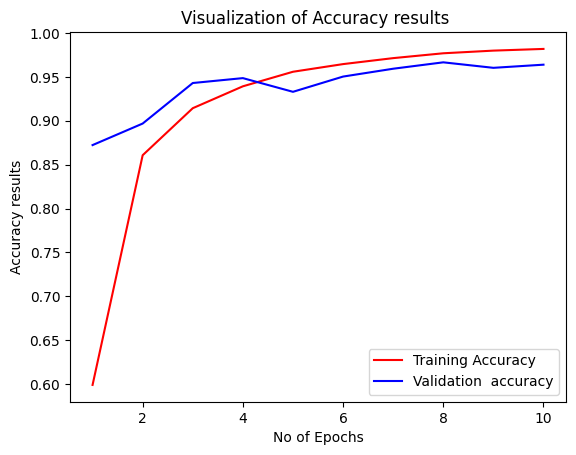

In [51]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation  accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy results')
plt.title("Visualization of Accuracy results ")
plt.legend()
plt.show()

In [52]:
## Some Other Matrics for model evaluation

In [53]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 15s 28ms/step


(array([[9.9999988e-01, 1.8299997e-09, 9.3849650e-15, ..., 8.5053217e-18,
         7.2218707e-18, 6.3158226e-14],
        [9.9996841e-01, 1.5962783e-08, 5.9252137e-13, ..., 2.6717076e-16,
         1.0978190e-15, 1.5461856e-13],
        [1.0000000e+00, 8.2491125e-11, 6.1411413e-14, ..., 1.1433075e-17,
         1.5778704e-18, 1.4582720e-12],
        ...,
        [2.5792961e-13, 1.3681435e-13, 4.7145279e-13, ..., 4.4321102e-16,
         1.4669226e-16, 1.0000000e+00],
        [5.4753697e-12, 6.2764464e-14, 7.2565885e-13, ..., 1.5947740e-15,
         7.9059149e-16, 1.0000000e+00],
        [9.8585635e-17, 8.6427884e-18, 6.8894039e-16, ..., 3.9737346e-17,
         2.4216010e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [58]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [60]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [72]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_true,predicted_categories,target_names=class_name)) 

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.96      0.97       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.96      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.

In [76]:
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[483,   8,   0, ...,   0,   0,   0],
       [  1, 491,   0, ...,   0,   0,   0],
       [  0,   0, 426, ...,   1,   0,   1],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

In [77]:
##Confusion matrix visualization

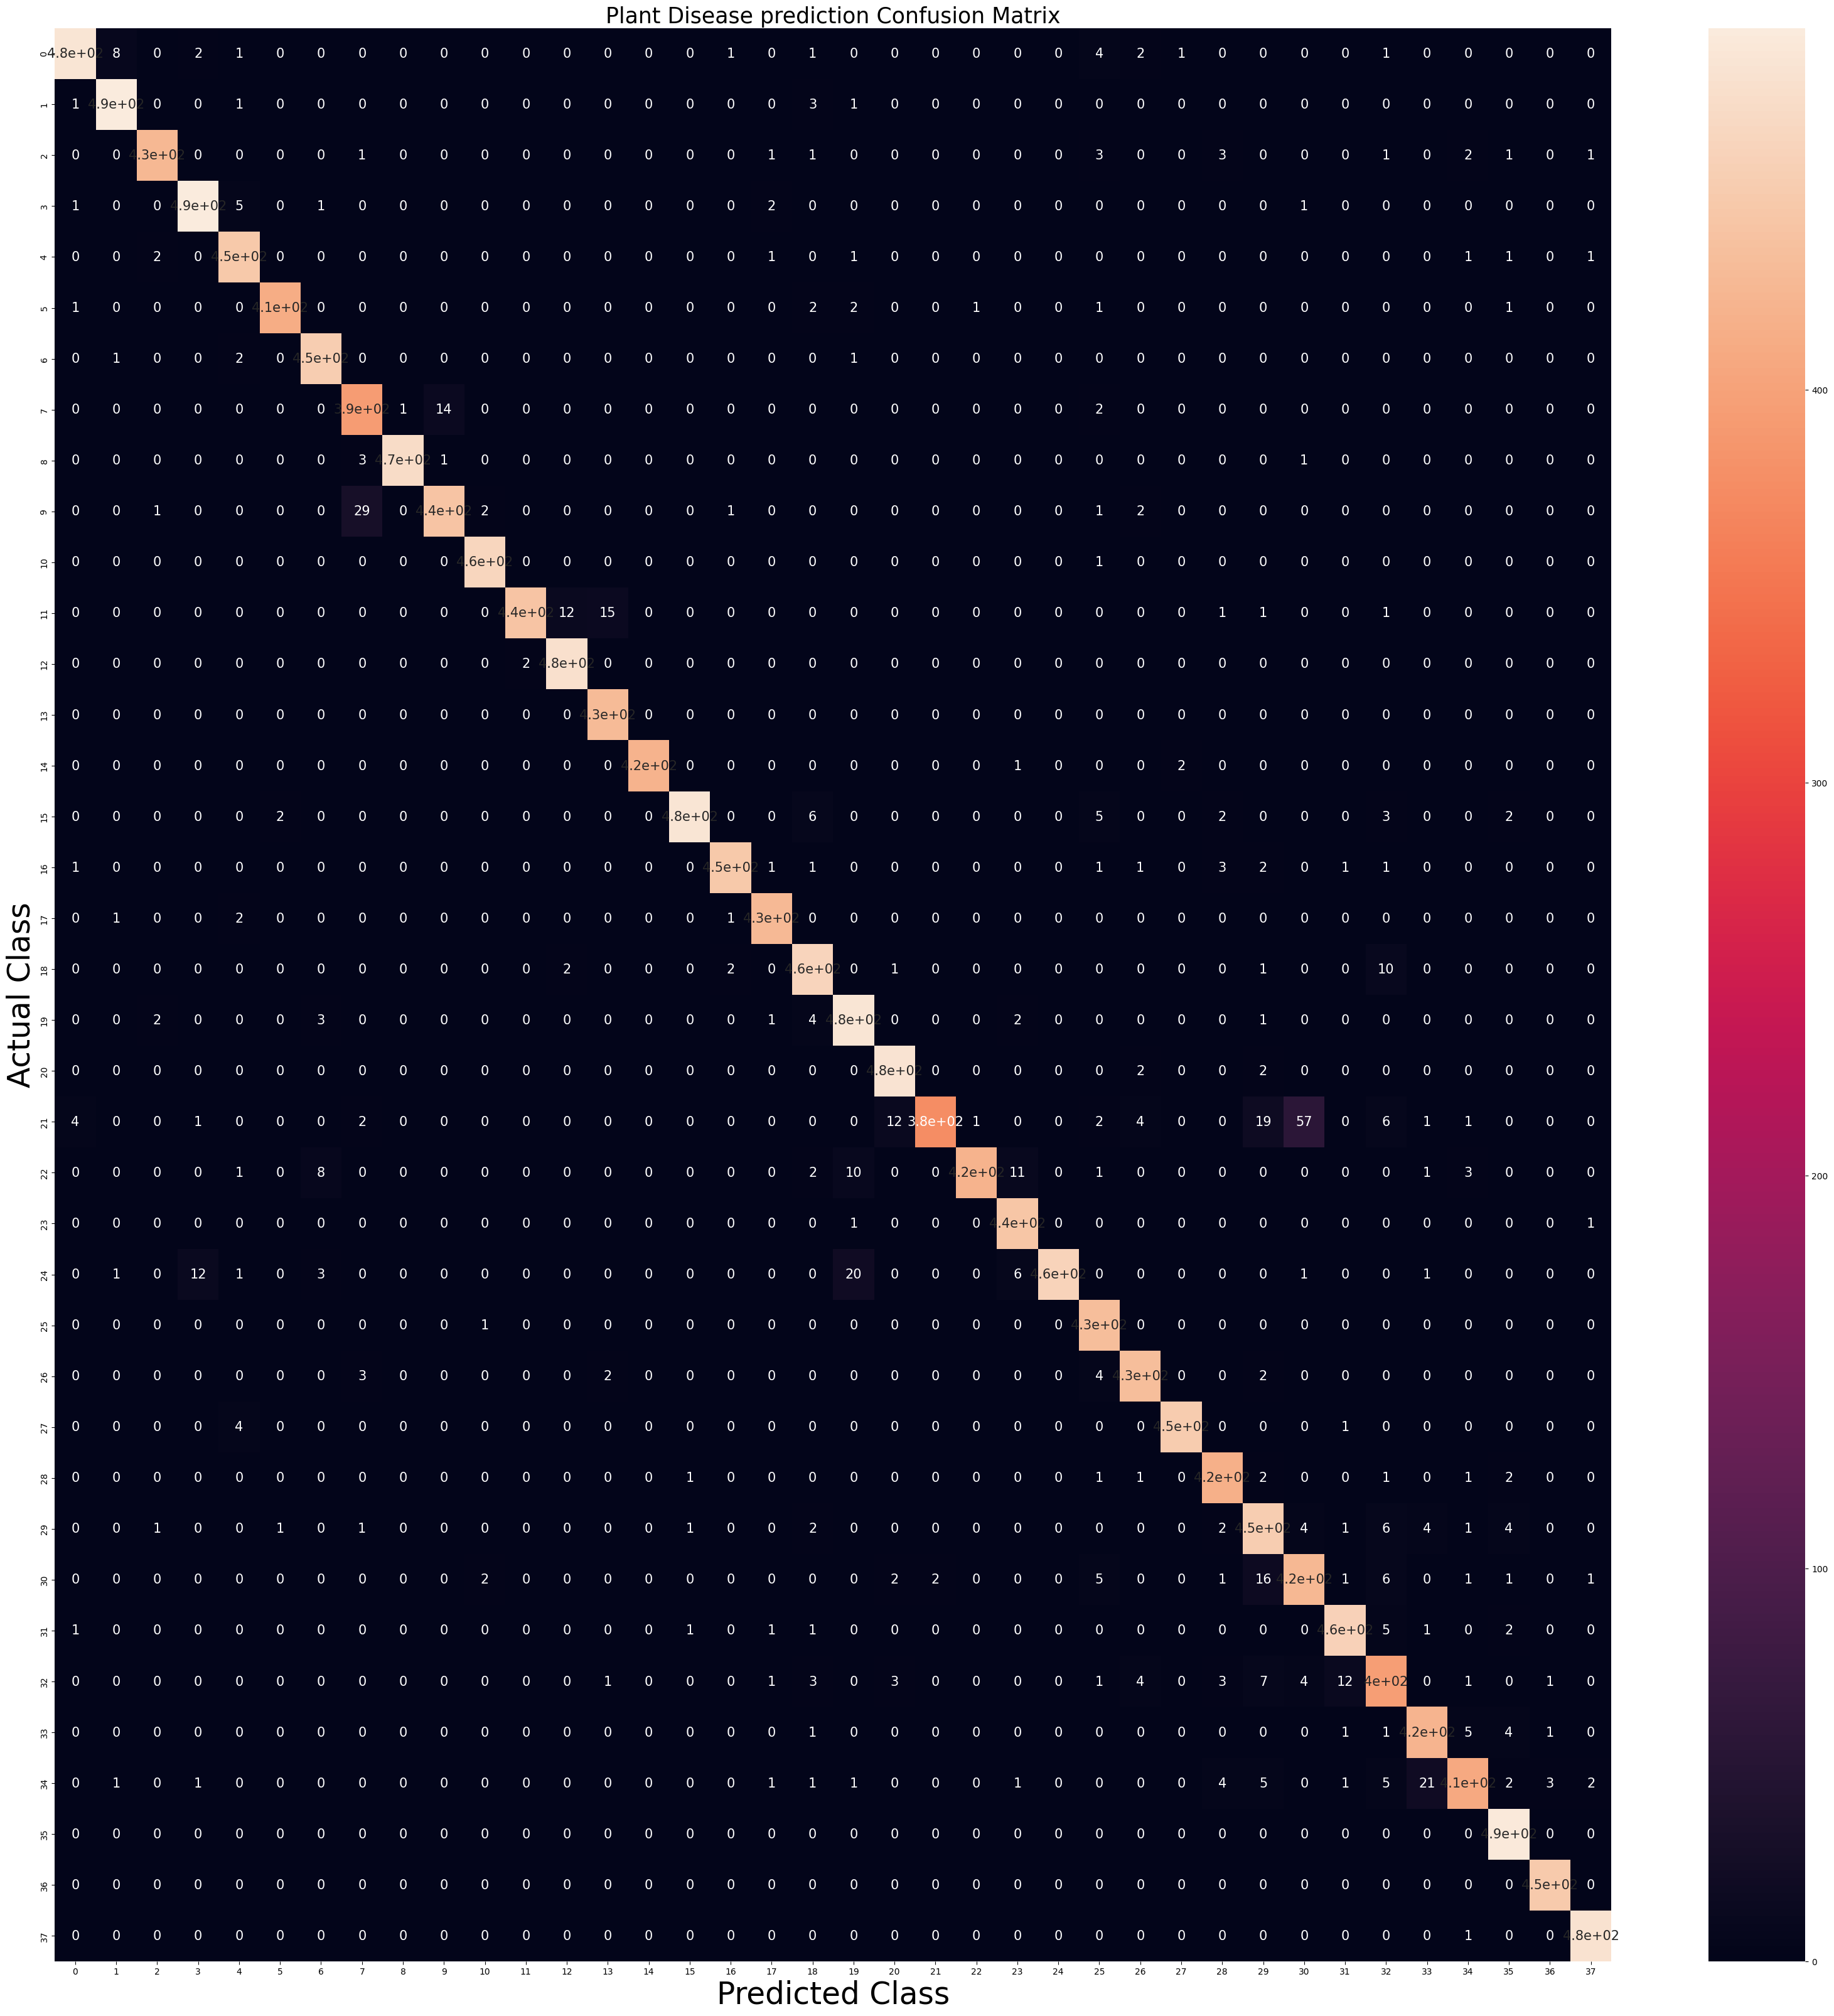

In [79]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=35)
plt.ylabel("Actual Class",fontsize=35)
plt.title("Plant Disease prediction Confusion Matrix",fontsize=25)
plt.show()